# Problem Statement

This dataset consist of medical and demographic data.The objective is to analyze the data to identify age-related trends and derive strategies for diabetes prevention. 

### Data Dictionary

**Gender**-The biological sex of the individual.Usually encoded as:0 =Female,1 =Male.Gender can impact diabetes risk due to hormonal and lifestyle differences.

**AGE**-The age of the patient in years.Age is a critical risk factor as diabetes risk increases with age.

**Urea**-A measurment of urea (in mg/dL) in the blood.High levels may indicate kidney issues,which are common complications of diabetes .Normal range:~7-20mg/dL

**Cr (Creatinine)**-Measures the level of creatinine in the blood (mg/dL).Normal range:~0.6-1.3mg/dL

**HbA1c(Glycated Hemoglobin)**-A Key indicator of average blood glucose levels over the past 2-3 months.Expressed as a percentage.-Normal:<5.7% -Prediabetic:5.7-6.4% -Diabetic:>=6.5%

**Chol (Cholesterol)**-Total cholesterol in the blood (mg/dL).High cholesterol is a risk factor for cardiovascular disease,often seen in diabetic individuals.Normal <200 mg/dL.

**TG (Triglycerides)**-Measures the amount of fat in the blood (mg/dL).High levels are associated with insulin resistance and metabolic syndrome.Normal:<150 mg/dL

**HDL (High Density Lipoprotein)**-The 'good' cholesterol(mg/dL).Higher levels are better.Helps remove excess cholesterol from the bloodstream.Ideal:>40 mg/dL(men)>50 mg/dL(women)  

**LDL (Low-Density Lipoprotein)**-The 'bad' cholesterol(mg/dL).High levels contribute to plaque buildup in arteries.-Optimal:<100 mg/dL.

**VLDL (Very Low-Density Lipoprotein)**-Another type of 'bad' cholesterol(mg/dL),carries triglycerides.Often estimated from TG/5.High VLDL is associated with increased diabetes risk.Normal 2-30mg/dL.

**BMI(Body Mass Index)**-A Measure of body fat based on height and weight(kg/m^2).Obesity(BMI>=30) is a major risk factor for Type 2 diabetes.-Underweight:<18.5-Normal:18.5-24.9-Overweight:25-29.9-Obese:>=30

**Class**-Target label: Indicates diabetes status.Typically coded as:0=Non-Diabetic,1=Diabetic,2=Predict-Diabetic.This is the outcome you're trying to predict or classify.

In [1]:
# Import standard liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# 1.Data understanding & Cleaning

In [3]:
# Read the dataset

In [4]:
df=pd.read_csv('Multiclass_Diabetes_Dataset.csv')
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [5]:
# Give the overall information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [7]:
# Give the stastical view of the dataset

In [8]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [9]:
# Shape of the dataset

In [10]:
df.shape

(264, 12)

In [11]:
# Size of the dataset

In [12]:
df.size

3168

In [13]:
# Check missing values

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
# Check the duplicates

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# check the columns

In [18]:
df.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')

In [19]:
# Check the datatypes

In [20]:
df.select_dtypes(include='number').columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')

# 2.Exploratory Data Analysis

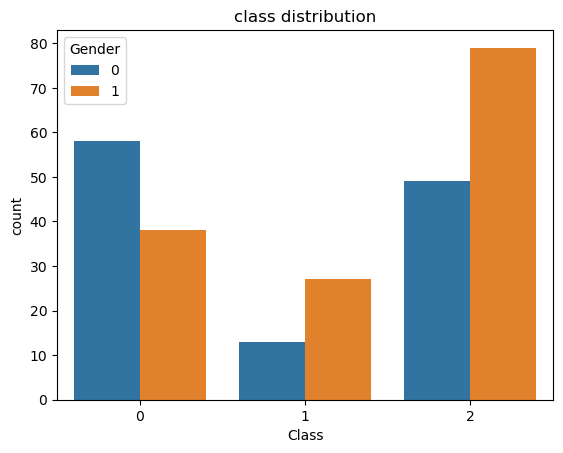

In [21]:
# check class balance:
plt.figure()
sns.countplot(x='Class',data=df,hue='Gender')
plt.title('class distribution')
plt.show()

**INSIGHTS**

From the above visual,in the non-diabetic class females are more than males.In the diabetic class there is males are higher than females ,in prediabetic class  males are more prone to diabetes than females.So,we can say that the females are more prevalent in the non-diabetic group,while males dominate both the diabetes & pre-diabetic classes,indicating a higher diabetes risk among males as disease severity increases.

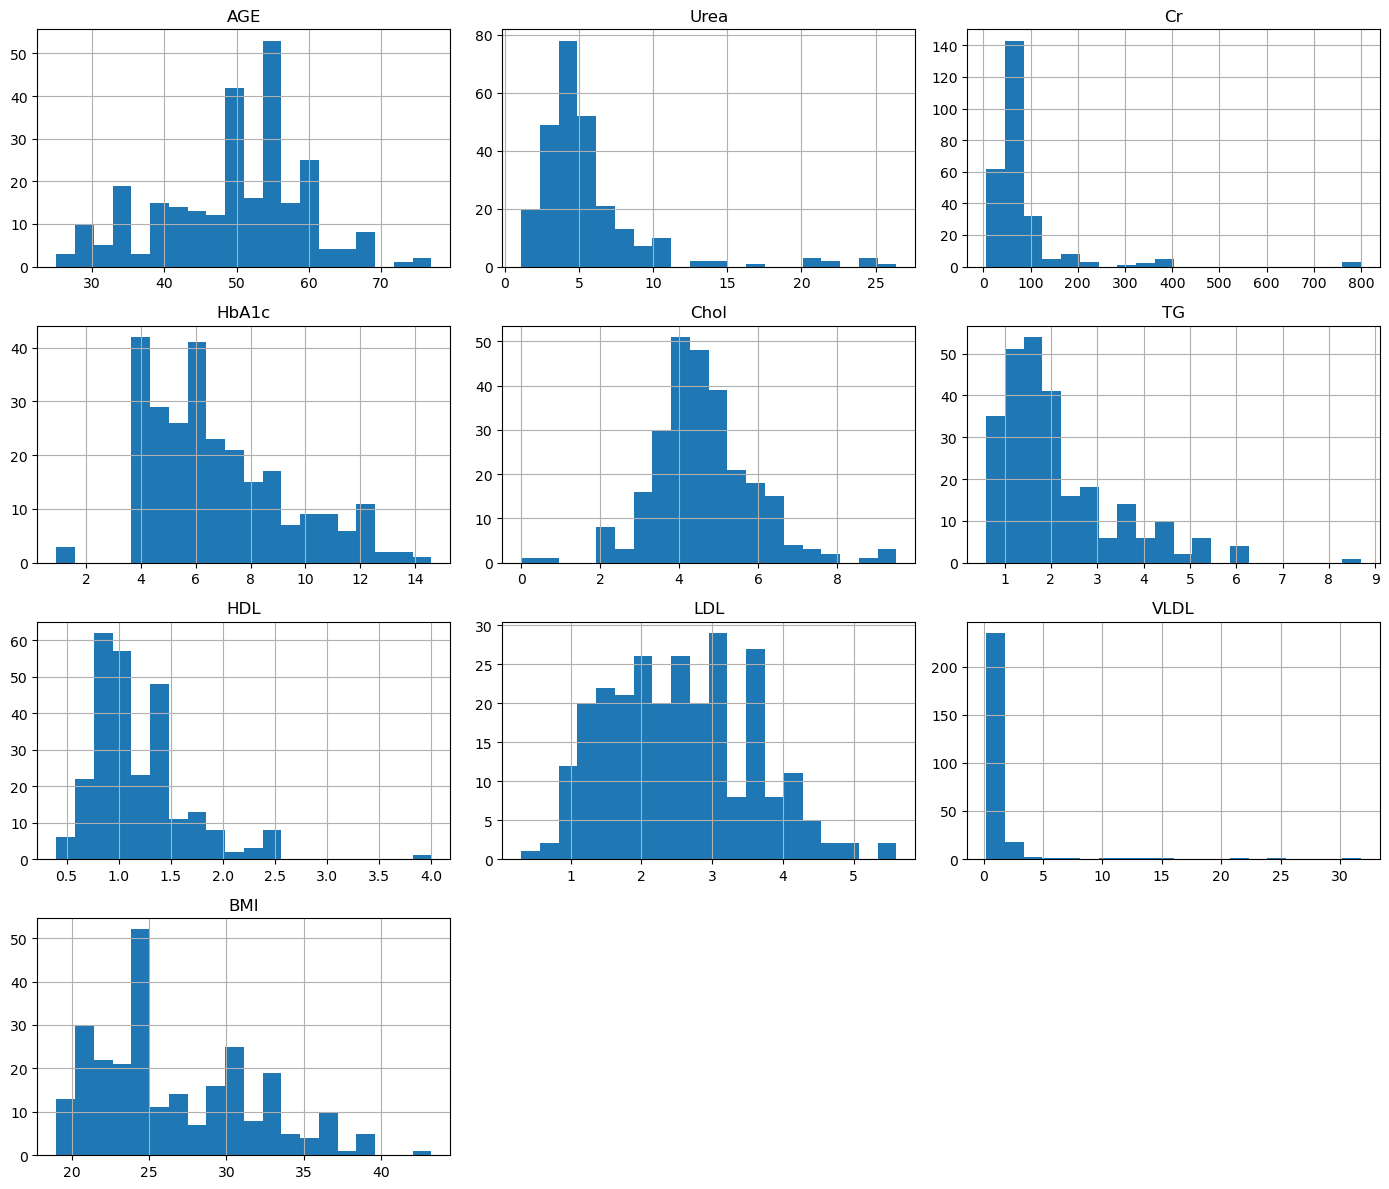

In [22]:
# Basic histograms for numeric features
num_cols=['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
df[num_cols].hist(bins=20,figsize=(14,12))
plt.tight_layout()
plt.show()

**INSIGHTS**

The analysis indicates that most patients are around the age of 55 with increasing urea & creatinine levels.High level of urea increases the risk of kidney issues. HbA1c values predominantly fall in the diabetic.Chol values shows the majority of individuals have moderately elevated cholesterol.A small number of cases have very high TG(>50),indicating high cardiovascular risk.HDL count is greater in between the range 0.8 and 1.5,it means majority of individuals have low HDL levels which is a risk factor for cardiovascular disease.In the LDL,most patients fall between LDL levels of 1.5 to 3.5 it means,majority of individuals have LDL in a moderately elevated zone.VLDL is highly concentrated at very low values at (0 to 5).Most BMI values fall between 22 and 30,indicating that a large portion of the individuals are in the overweight to moderately obese range. 

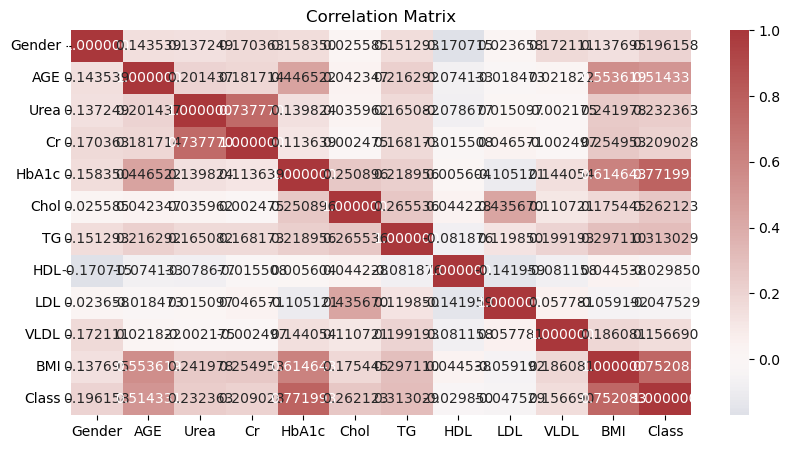

In [27]:
# Correlation matrix & heatmap
Corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Corr,annot=True,fmt='2f',cmap='vlag',center=0)
plt.title('Correlation Matrix')
plt.show()

**INSIGHTS**

From the above visual,we can say BMI & HbA1c are the most inflential variables to identify the target which is class.
Gender & VLdl are most irrelevant variables with the very weak relationship with a target variable i.e.class.Before proceeding with the model creation we can remove this irrelevant columns.

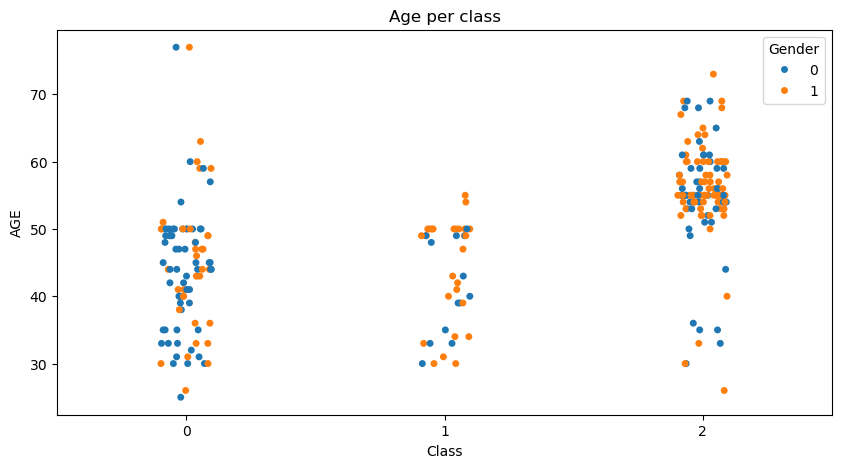

In [24]:
# Age distribution per class
plt.figure(figsize=(10,5))
sns.stripplot(x='Class',y='AGE',data=df,hue='Gender')
plt.title('Age per class')
plt.show()

**INSIGHTS**

In the non-diabetic class there is females are more than males at the age range 40 to 50. In diabetic class males are more at age >50 than females.In prediabetic class,in the age range 50 to 60 the males are more than females.It means that, we can say as age increases the risk of diabetes in males also increases.

# Storytelling Deliverable

**Root Causes**-

The progression from normal to prediabetes to diabetes is primarily driven by poor glucose regulation,increased BMI,age related metabolic decline and signs of kidney stress.

**Key patterns**-

1.The females are more prevalent in non-diabetic class. while,males are dominant in both diabetic and non-diabetic classes ,indicates a higher risk of diabetes in males as disease seriousness.

2.At the age around 55 the high in urea and creatinine.The high amount of urea indicates kidney issues.HbA1c predominantly fall in the diabetic class.Patient have moderate amount of chol,TG is high at very low cases.High level of TG indicates High cardiovascular diseases.Majority patients have very low HDL indicates risk of cardiovascular diseases.Maximum patients have LDL in moderately elevated zone.
VLDL is highly concentrated in more patients at very low values so,majority patients have VLDL in the normal range.It's generally good for heart health.It's high level contribute to artery plaque,raising heart attack/stroke.BMI levels are fall in the range 22 to 30 ,indicates individuals are in the overweight to moderate obese condition.

3.BMI & HbA1c are the most inflential variables to identify the target .From the inflential variables ie.BMI & HbA1c Irrelevant variables are Gender & VLDL have very weak relationship with a target variable which is class. 

4.Risk of diabetes increases as the age increases so,the more no.of males are related to this pattern than females. 

**Recommended Actions to prevent diabetes**-

Individual's who are willing to stay healthy do control diet,stay physically active,maintain healthy weight,monitor key health indicators ,educate pre-diabetic patients by providing them personalized preventive plans to prevent diabetes progression.